In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


from sklearn.preprocessing import MinMaxScaler

In [17]:
df=pd.read_excel('英文关键词标注.xlsx')
d={'experience':'卫生',
'facility':'设施',
'staff':'服务',
'price':'价位',
'internet':'服务',
'room':'卫生',
'food':'餐饮',
'environment':'环境',
'travel':'交通',
'location':'交通',
'service':'服务'}
df=df[df['category']!=0]
df['category']=df['category'].apply(lambda x:x.strip())
df['类别']=df['category'].apply(lambda x:d[x])

In [18]:
d={}
for i in range(len(df)):
    row=df.iloc[i]
    if row['类别']!=0:
        d[row['keywords']]=row['类别']

In [19]:
with open('英文主题词.txt','r',encoding='utf-8')as f:
    rows=f.readlines()
    dl=[]
    for i in range(len(rows)):
        row=rows[i]
        dd={}
        for r in row.split('\t')[1].split():
            k,v=r.split(':')
            if k in d:
                if d[k] in dd:
                    dd[d[k]]+=float(v)
                else:
                    dd[d[k]]=float(v)
        dl.append(dd)

In [20]:
df_k=pd.DataFrame(dl)
x=MinMaxScaler().fit_transform(df_k)

In [21]:
km = KMeans(n_clusters=5, random_state = 666)   #将数据集分为2类
y_pre = km.fit_predict(x)
print(calinski_harabaz_score(x, y_pre)) 

12.297655488808703


In [65]:
X=pd.DataFrame(km.cluster_centers_,columns=df_k.columns)
ddd={'Service':'服务','Facility':'设施','Cleanness':'卫生','Environment':'环境','Transportation':'交通','Food':'餐饮','Price':'价位'}
trans={}
for k in ddd:
    trans[ddd[k]]=k
trans
X.columns=[trans[col] for col in X.columns]
X

,Service,Food,Transportation,Facility,Cleanness,Environment,Price
0,0.738175,0.877425,0.878510,0.119820,0.737405,0.810194,0.136625
1,0.675826,0.768318,0.903181,0.061957,0.772990,0.372021,0.093183
2,0.016683,0.317529,0.000000,1.000000,0.000000,0.805825,1.000000
3,0.738142,0.122227,0.847669,0.148698,0.860501,0.732201,0.032587
4,0.000000,0.360157,0.991286,0.059760,0.857382,1.000000,0.076585


In [53]:
config = {
    "font.family":'serif',
    "font.size": 5,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
plt.rcParams.update(config)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


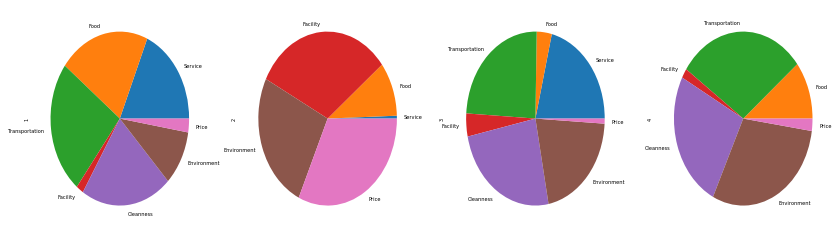

In [59]:
 fig = plt.figure(figsize=(18,4)) 

for i in range(1,5):
    ax = fig.add_subplot(1,5,i+1)    
    X.iloc[i].plot(kind='pie',ax=ax)
plt.savefig('英文饼图.png',dpi=200,bbox_inches='tight')

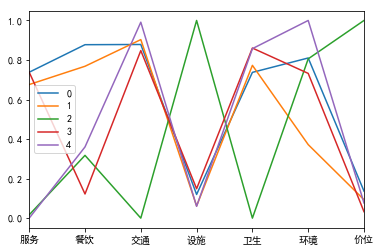

In [23]:
pd.DataFrame(km.cluster_centers_,columns=df_k.columns).T.plot()

In [24]:
y_pre

array([2, 1, 4, 0, 1, 1, 1, 3, 0, 1, 1, 0, 3, 1, 1, 0, 1, 1, 1, 0])

In [66]:
df=pd.read_excel('中文关键词标注.xlsx')
d={}
for i in range(len(df)):
    row=df.iloc[i]
    if row['类别']!=0:
        d[row['keywords']]=row['类别']
with open('中文主题词.txt','r',encoding='utf-8')as f:
    rows=f.readlines()
    dl=[]
    for i in range(len(rows)):
        row=rows[i]
        dd={}
        for r in row.split('\t')[1].split():
            k,v=r.split(':')
            if k in d:
                if d[k] in dd:
                    dd[d[k]]+=float(v)
                else:
                    dd[d[k]]=float(v)
        dl.append(dd)
df_k=pd.DataFrame(dl)
x=MinMaxScaler().fit_transform(df_k)
km = KMeans(n_clusters=5, random_state = 666)   #将数据集分为2类
y_pre = km.fit_predict(x)
print(calinski_harabaz_score(x, y_pre)) 
X=pd.DataFrame(km.cluster_centers_,columns=df_k.columns)
ddd={'Service':'服务','Facility':'设施','Cleanness':'卫生','Environment':'环境','Transportation':'交通','Food':'餐饮','Price':'价位'}
trans={}
for k in ddd:
    trans[ddd[k]]=k
trans
X.columns=[trans[col] for col in X.columns]

4.7079018528166285


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


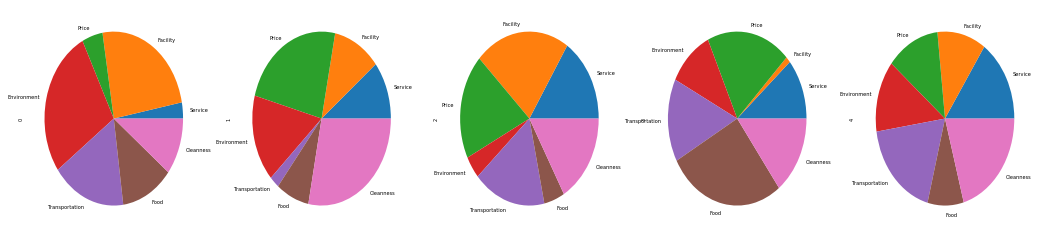

In [69]:
fig = plt.figure(figsize=(18,4)) 

for i in range(0,5):
    ax = fig.add_subplot(1,5,i+1)    
    X.iloc[i].plot(kind='pie',ax=ax)
plt.savefig('中文饼图.png',dpi=200,bbox_inches='tight')

In [68]:
X

,Service,Facility,Price,Environment,Transportation,Food,Cleanness
0,0.107467,0.884112,0.174018,0.989857,0.616383,0.438928,0.380320
1,0.367611,0.380099,0.817348,0.553560,0.077191,0.265068,0.960107
2,0.591866,0.824724,0.731037,0.156136,0.631489,0.180702,0.624993
3,0.397369,0.039796,0.688228,0.376082,0.543660,0.960339,0.517591
4,0.482576,0.354212,0.385991,0.416086,0.579598,0.263309,0.645673


In [64]:
X

,Service,Food,Transportation,Facility,Cleanness,Environment,Price
0,0.738175,0.877425,0.878510,0.119820,0.737405,0.810194,0.136625
1,0.675826,0.768318,0.903181,0.061957,0.772990,0.372021,0.093183
2,0.016683,0.317529,0.000000,1.000000,0.000000,0.805825,1.000000
3,0.738142,0.122227,0.847669,0.148698,0.860501,0.732201,0.032587
4,0.000000,0.360157,0.991286,0.059760,0.857382,1.000000,0.076585
